**Importing Tensorflow and json**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

2023-02-12 10:45:21.213818: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 10:45:21.320161: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 10:45:21.320179: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-12 10:45:21.793274: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

**Tokenizer and model settings**

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
padding_type = 'post'
trunc_type = 'post'
oov_token = "<OOV>"
training_size = 20000

**Loading dataset**

In [4]:
with open("Sarcasm_Headlines_Dataset.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

**Categorizing data as training and test**

In [5]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

**Creating tokenizer**

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


print(training_padded[0])
print(training_padded.shape)

[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(20000, 100)


**Converting data to numpy arrays**

In [7]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

**Creating the model**

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-02-12 10:46:10.169577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 10:46:10.169764: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 10:46:10.169799: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-12 10:46:10.169824: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-12 10:46:10.169850: W tensorflow/c

**Model Summary**

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


**Training the model**

In [10]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.6694 - accuracy: 0.5703 - val_loss: 0.6027 - val_accuracy: 0.6597 - 1s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.4419 - accuracy: 0.8232 - val_loss: 0.3841 - val_accuracy: 0.8392 - 704ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 0.3096 - accuracy: 0.8752 - val_loss: 0.3528 - val_accuracy: 0.8505 - 675ms/epoch - 1ms/step
Epoch 4/30
625/625 - 1s - loss: 0.2573 - accuracy: 0.8985 - val_loss: 0.3457 - val_accuracy: 0.8554 - 663ms/epoch - 1ms/step
Epoch 5/30
625/625 - 1s - loss: 0.2213 - accuracy: 0.9147 - val_loss: 0.3457 - val_accuracy: 0.8544 - 671ms/epoch - 1ms/step
Epoch 6/30
625/625 - 1s - loss: 0.1950 - accuracy: 0.9257 - val_loss: 0.3529 - val_accuracy: 0.8548 - 672ms/epoch - 1ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1719 - accuracy: 0.9355 - val_loss: 0.3639 - val_accuracy: 0.8542 - 671ms/epoch - 1ms/step
Epoch 8/30
625/625 - 1s - loss: 0.1537 - accuracy: 0.9423 - val_loss: 0.3787 - val_accuracy: 0.8530 - 675ms/epoch - 1ms/step
Epo

**Plotting model training**

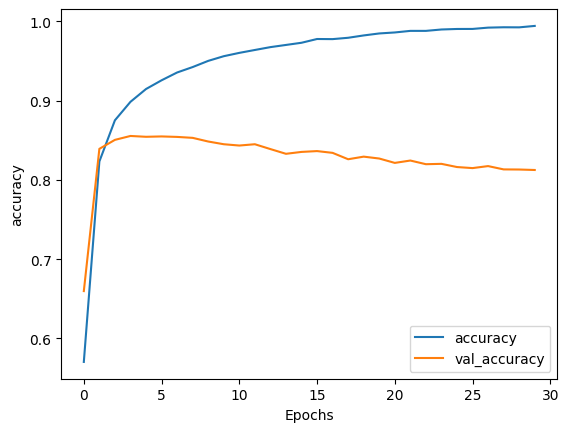

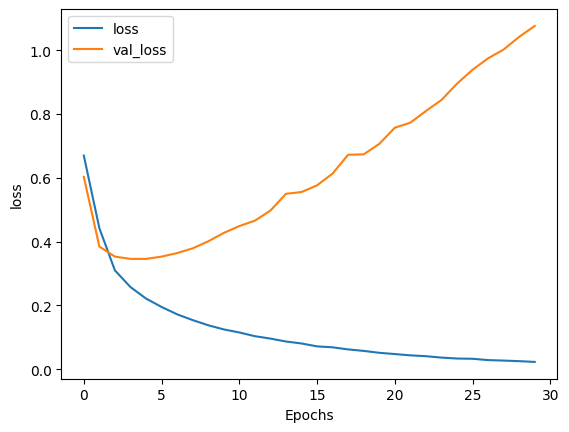

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

**Predicting sarcasm**

In [38]:
sentence = [
    "Life's good, you should get one.",
    "It's okay if you don't like me. Not everyone has good taste.",
    "The weather today is bright and shiny",
    "game of thrones season finale showing this sunday night",
]

sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

predictions = model.predict(padded)

predictions = ["Sarcasm" if pred > 0.5 else "Normal" for pred in predictions]

print(predictions)

1/1 [==============================] - 0s 13ms/step
['Sarcasm', 'Sarcasm', 'Normal', 'Normal']
